# 初心者向け講座#1

- どういうデータがあるか・タスクを理解しよう
- データを眺めよう
- 学習の枠組みを作ってみよう

一番初めにやることは、コードを書くことではなくデータのスキーマと実際にどういうデータが入っているのかを確認することです。自分が使える情報は何か・それはどのような構造を持っているか・実際にどういう値が入っているかをしっかりと把握してください。たとえばテキストの表記ゆれなどは人間が見たほうがすぐわかります。

今回のようなログデータは巨大なことが多いので、EXCELで眺めるのは難しいです。
しかし、今回のコンペティションはそんなにデータ数が多くないので、EXCELなどのソフトで全体を眺めることをおすすめします。

そうすればデータ定義のカラムの説明よりも深い理解をすることができます。

最初は中身をEXCELやgoogle spredsheetなどで開いて中身を確認しましょう。
個人的な最近のおすすめは[CSV+](https://www.plus-one.tech/csv-plus/)

一方EXCELでは集計情報を取るのは苦手なので、こちらはpythonを使って集計していきましょう。例えば日毎の売上などはEXCELでみることはほぼ不可能です。

In [1]:
import os
from time import time
from contextlib import contextmanager
from pathlib import Path

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates

import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import sweetviz as sv
sv.config_parser.read('sweetviz_settings.ini')

['sweetviz_settings.ini']

In [2]:
#Config

INPUT_DIR = Path('../input')
OUTPUT_DIR = Path('../output')

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
sample_df = pd.read_csv(os.path.join(INPUT_DIR, 'sample.csv'), names=['date', 'y'])

train_df['is_train'] = 1
test_df['is_train'] = 0
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

whole_df = pd.concat([
            train_df, 
            test_df
            ]).reset_index(drop=True)

In [4]:
train_df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,is_train
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,1
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,1
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,1
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,1
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,1


In [5]:
test_df.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,is_train
0,2014-10-01,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2,0
1,2014-10-02,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9,0
2,2014-10-03,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7,0
3,2014-10-06,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5,0
4,2014-10-07,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1,0


## sweetvizで全体感を把握する

中身を確認したら、pandasやmatplotlibで可視化するのもいいですが、一つ一つグラフを作るのは大変なので、
pandas profilingやsweetvizなどのグラフ作成を補助してくれるツールを使ってざっくり全体感を把握しましょう。
今回はsweetvizを使って可視化してみます。

日本語の可視化の際は以下のフォントをインストールする必要あり
[noto font](https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip)

ubuntu linux
```
$ sudo apt install fonts-noto-cjk
$ sudo fc-cache -fv
```

かつ設定ファイルを事前に作成し、入れないといけない。公式docに記載している内容を持ってこればOK
https://github.com/fbdesignpro/sweetviz#customizing-defaults-the-config-file

In [6]:
my_report = sv.compare([train_df, "Train"], [test_df, "Test"], "y")
#直接ブラウザに表示
my_report.show_html("sweetviz_report.html")

  0% 0/14.0 [00:00<?, ?it/s]

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## trainとtestの違いを確認

**なぜ違いを確認するのか。**
今回のタスクだとtrainに晴れの情報しかなく、testに晴れと雨の情報があると予測の方法、傾向が変わりますよね？
そのため、trainデータとtestデータにどのような差があるのか事前に確認することが重要です。

Text(0.5, 1.0, 'datetimeの集合比較')

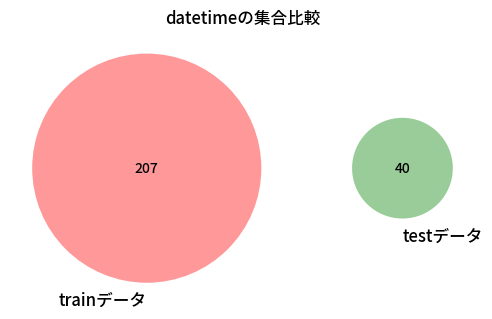

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
venn2(subsets=(set(train_df['datetime'].unique()), set(test_df['datetime'].unique())),
     set_labels=('trainデータ', 'testデータ'), ax=ax)
ax.set_title('datetimeの集合比較')

In [8]:
print('train期間', train_df['datetime'].min(), train_df['datetime'].max())
print('test期間', test_df['datetime'].min(), test_df['datetime'].max())

train期間 2013-11-18 00:00:00 2014-09-30 00:00:00
test期間 2014-10-01 00:00:00 2014-11-28 00:00:00


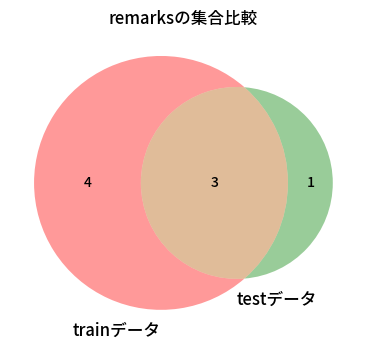

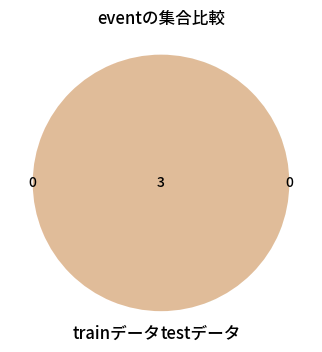

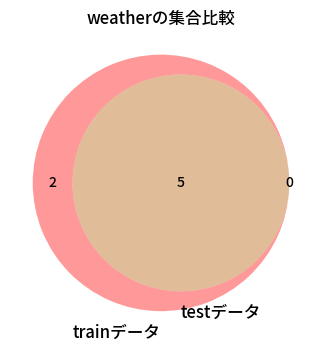

In [9]:
for col in ['remarks', 'event', 'weather']:
    fig, ax = plt.subplots(figsize=(6, 4))
    venn2(subsets=(set(train_df[col].unique()), set(test_df[col].unique())),
         set_labels=('trainデータ', 'testデータ'), ax=ax)
    ax.set_title(f'{col}の集合比較')
    plt.show()

In [10]:
train_df['weather'].value_counts()

快晴    53
曇     53
晴れ    50
薄曇    25
雨     24
雷電     1
雪      1
Name: weather, dtype: int64

In [11]:
test_df['weather'].value_counts()

快晴    12
曇      9
雨      8
晴れ     7
薄曇     4
Name: weather, dtype: int64

# データの可視化

## お弁当売上個数推移と売り切れ回数
- 全体的にどんどんお弁当が売れる個数が少なくなっていっている傾向が見える。
- たまにスパイクのようなものがみえるので、特定のメニューのときに売れたりする？

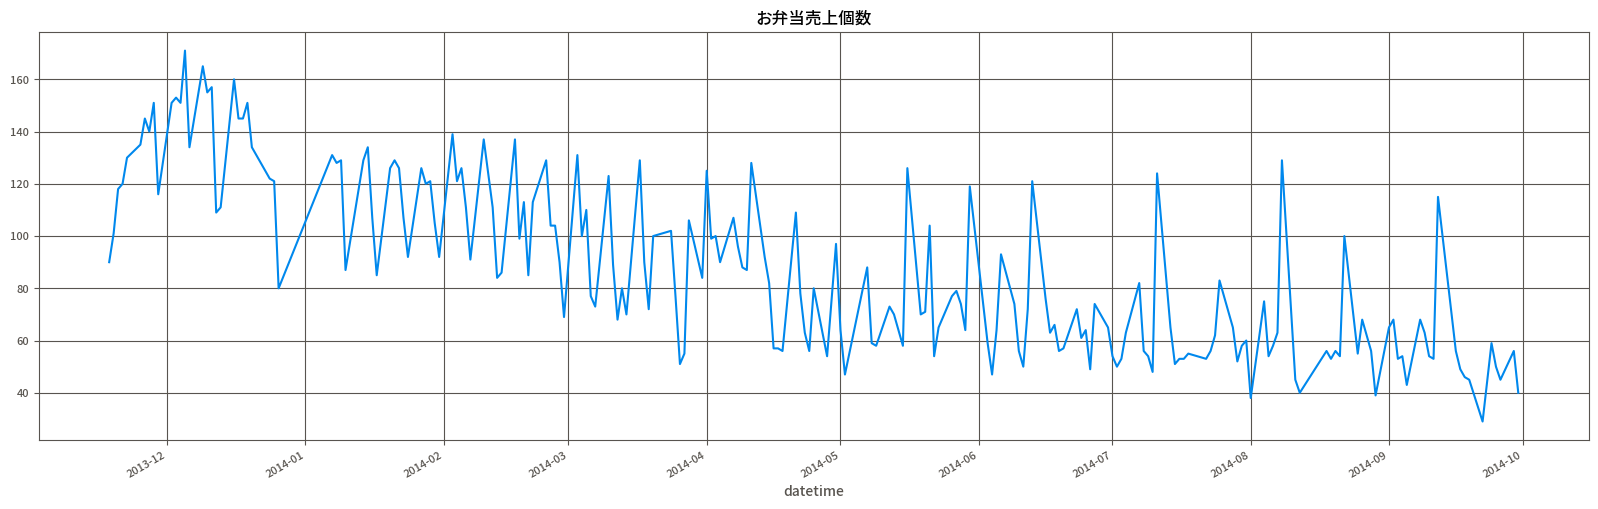

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
train_df.groupby('datetime')['y'].sum().plot(ax=ax)
ax.grid()
ax.set_title('お弁当売上個数');

<AxesSubplot:xlabel='soldout', ylabel='Count'>

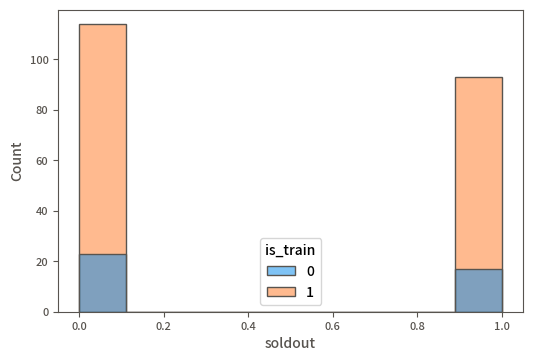

In [13]:
sns.histplot(data=whole_df, x='soldout', hue='is_train')

突然売れている個数がスパイクしているものがありますね。これを抽出して内容確認してみます。
前日との差分を取ってスパイクを取ります

In [14]:
_df = train_df.copy()
_df['diff_y'] = _df['y'] - _df['y'].shift(1)
_df[['y', 'diff_y']].head(10)

,y,diff_y
0,90,NaN
1,101,11.0
2,118,17.0
3,120,2.0
4,130,10.0
5,135,5.0
6,145,10.0
7,140,-5.0
8,151,11.0
9,116,-35.0


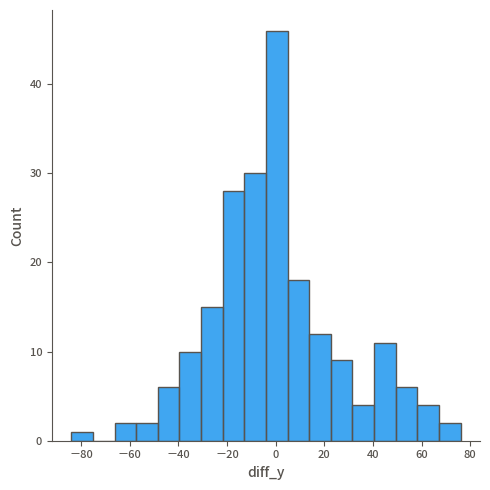

In [15]:
sns.displot(_df['diff_y'])

40あたりに別の山がありますね。これらを抽出しましょう。

In [16]:
_df[_df['diff_y']>40]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,is_train,diff_y
20,2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3,1,49.0
28,2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,NaN,快晴,--,7.3,1,51.0
32,2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,NaN,晴れ,--,5.8,1,42.0
36,2014-01-20,126,月,1,ジューシーメンチカツ,375.0,NaN,NaN,NaN,晴れ,--,6.5,1,41.0
46,2014-02-03,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9,1,47.0
51,2014-02-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,NaN,1.0,曇,--,7.8,1,46.0
55,2014-02-17,137,月,1,チンジャオロース,416.0,NaN,NaN,NaN,晴れ,--,11.6,1,51.0
65,2014-03-03,131,月,0,ハンバーグカレーソース,407.0,NaN,NaN,NaN,曇,--,7.8,1,62.0
70,2014-03-10,123,月,0,海老クリーミ―クノーデル,385.0,NaN,NaN,1.0,曇,--,7.6,1,50.0
75,2014-03-17,129,月,0,鶏の唐揚げおろしソース,382.0,NaN,NaN,NaN,快晴,--,14.0,1,59.0


- かなり高カロリーそうなものが多い
- お楽しみメニューだと売れやすいんでしょうか？
- カレーのカロリーが入っていない。
- ほとんど晴れか曇り、快晴

なにか他にも傾向が見られるでしょうか？様々な分析手法を試してみましょう

## 販売物のカロリーの確認
testの方が高カロリーのものを販売している傾向にある。

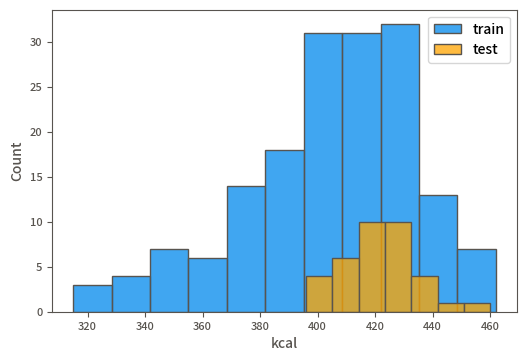

In [17]:
sns.histplot(data=train_df, x='kcal', label='train')
sns.histplot(data=test_df, x='kcal', label='test', color='orange')
plt.legend()

<AxesSubplot:xlabel='kcal', ylabel='y'>

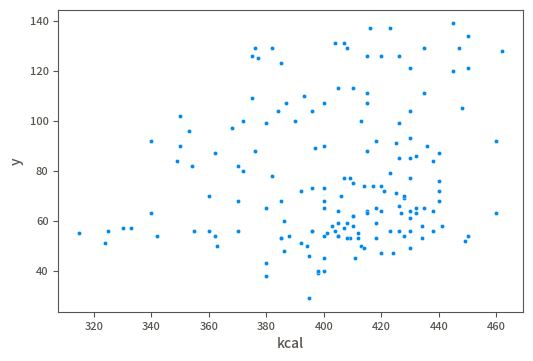

In [18]:
sns.scatterplot(data=train_df, x='kcal', y='y')

### 高カロリーだと売り切れになりやすいか確認
ピークは違うので若干の傾向があるかもしれない。

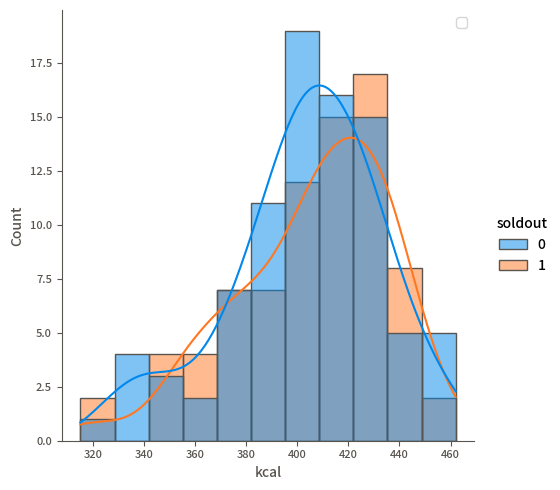

In [19]:
sns.displot(data=train_df, x='kcal', hue='soldout', kde=True)
plt.legend()

## 気温との関係

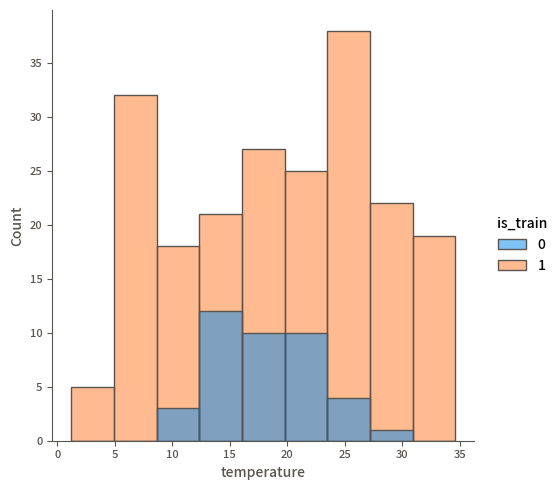

In [20]:
sns.displot(data=whole_df, x='temperature', hue='is_train')

気温が高いとあまり売れず、気温が低いと売れる？

<AxesSubplot:xlabel='temperature', ylabel='y'>

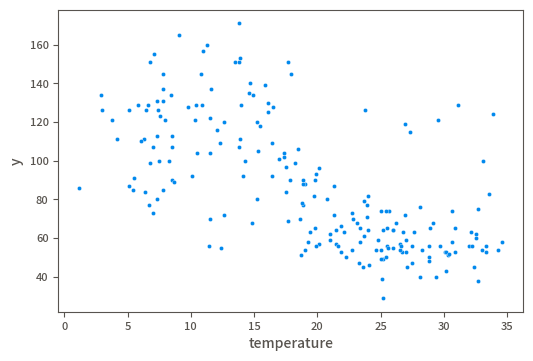

In [21]:
sns.scatterplot(data=train_df, x='temperature', y='y')

気温が低いと売れるのもある可能性があるが、おそらく徐々に販売個数が下がっているようにも見える

<AxesSubplot:xlabel='datetime', ylabel='y'>

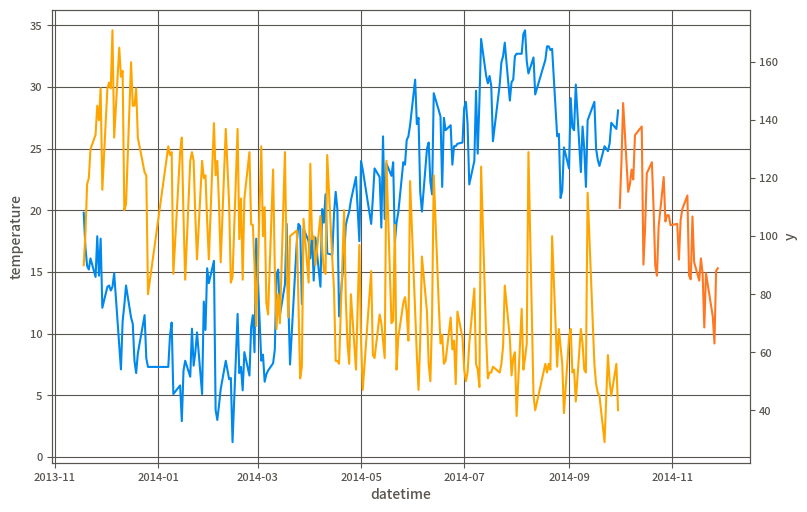

In [22]:
fig, ax1 = plt.subplots(figsize=(9,6))
sns.lineplot(data=train_df, x='datetime', y='temperature', ax=ax1)
sns.lineplot(data=test_df, x='datetime', y='temperature', ax=ax1)

xfmt = dates.DateFormatter("%m/%d")
xloc = dates.DayLocator()
ax1.xaxis.set_major_locator(xloc)
ax1.xaxis.set_major_formatter(xfmt)
ax1.grid(True)

ax2 = ax1.twinx()
sns.lineplot(data=train_df, x='datetime', y='y', ax=ax2, color='orange')

## その他

メニューの名前から分析してみましょう。

名前にカレーを含む場合、売上個数があがるのかそうでないのか確認しましょう。

それがたまたまなのかそうでないのかメディアン検定で確認する。

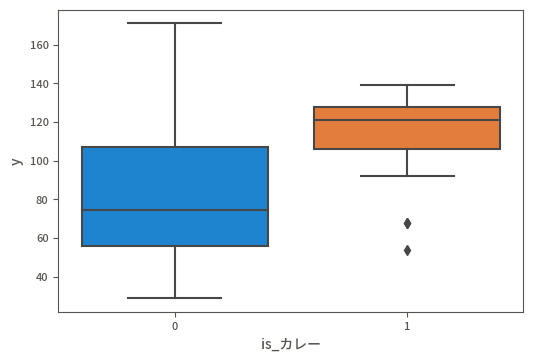

p 0.010699742900892427 stat 6.514516162828877


In [23]:
from scipy.stats import median_test

def plot_boxplot_findname(find_name, input_df):
    new_col_name = f'is_{find_name}'
    graph_df = input_df.copy()
    graph_df[new_col_name] = graph_df["name"].apply(lambda x : 1 if x.find(find_name)>=0 else 0)
    sns.boxplot(data=graph_df, x=new_col_name, y='y')
    plt.show()
    
    stat,p,med,tbl = median_test(graph_df[graph_df[new_col_name]==1]["y"],graph_df[graph_df[new_col_name]==0]["y"])
    print("p",p,"stat",stat)
    
plot_boxplot_findname('カレー', train_df)

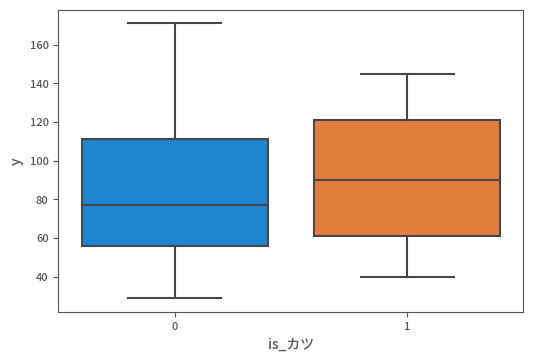

p 0.5441751269349027 stat 0.36785623849754634


In [24]:
plot_boxplot_findname('カツ', train_df)

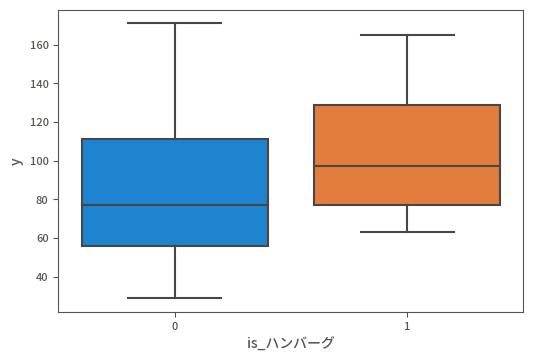

p 0.16071796287563173 stat 1.967457781321501


In [25]:
plot_boxplot_findname('ハンバーグ', train_df)

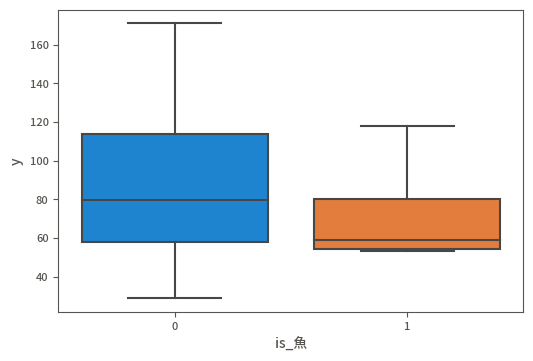

p 0.4496194596688876 stat 0.5716109936786515


In [26]:
plot_boxplot_findname('魚', train_df)

# 特徴量とはなにか
予測変数に紐付いた説明変数のことを「特徴量」と呼びます。近年の進歩でたくさんのアルゴリズムが開発され予測能力は向上していますが、アルゴリズムに入力するデータは人間が用意しなくてはなりません。この予測の元になるデータを特徴量とよび、アルゴリズムが理解しやすい特徴量を作ることを特徴量エンジニアリングと呼びます。

基本的に特徴量は予測対象に対しての数値です。今回はお弁当の販売数 `y` に対して予測するので、特徴量も `y` に対して紐づくようなものを作る必要があります。

## 機械学習モデルが扱える形式に直す
機械学習が理解できるのは基本的に数値の形式のみです。これらの数値への変換は人間の仕事になります。

## 数値系
数値特徴量はそのまま使いましょう

In [27]:
def create_numeric_feature(input_df):
    use_columns = [
        'soldout', 
    ]
    return input_df[use_columns].copy()

create_numeric_feature(train_df)

,soldout
0,0
1,1
2,0
3,1
4,1
...,...
202,1
203,0
204,0
205,1


In [28]:
def create_kcal_feature(input_df):
    out_df = pd.DataFrame()
    kcal_mean_value = round(input_df['kcal'].mean())
    out_df['kcal'] = input_df['kcal'].fillna(kcal_mean_value)
    return out_df

create_kcal_feature(train_df)

,kcal
0,404.0
1,404.0
2,404.0
3,404.0
4,404.0
...,...
202,408.0
203,394.0
204,404.0
205,404.0


In [29]:
def create_payday_feature(input_df):
    out_df = pd.DataFrame()
    out_df['payday'] = input_df['payday'].fillna(0)
    return out_df

create_payday_feature(train_df)

,payday
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
202,0.0
203,0.0
204,0.0
205,0.0


降水量は0のときは`--`がついているので、埋めないといけません。

In [30]:
def create_precipitation_feature(input_df):
    out_df = pd.DataFrame()
    _df = input_df['precipitation']
    _df = _df.replace('--', -1)
    out_df['precipitation'] = _df.astype(float)
    return out_df

create_precipitation_feature(train_df)

,precipitation
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
202,0.0
203,0.0
204,-1.0
205,-1.0


## テキスト系のカラム
基本的にこうやってどんどん特徴量と呼ばれるものを作っていきます。次はテキスト系を作っていきます。
オリエンテーションでもありましたが、カレーのであるかの特徴量を作ります。

In [51]:
def create_is_curry_feature(input_df):
    out_df = pd.DataFrame(index=input_df.index)
    out_df["is_curry"] = input_df["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
    return out_df

create_is_curry_feature(train_df).head(30)

,is_curry
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## remarksの特徴量

In [36]:
print('train')
display(train_df['remarks'].value_counts())
print('test')
display(test_df['remarks'].value_counts())

train


お楽しみメニュー                    12
料理長のこだわりメニュー                 5
スペシャルメニュー（800円）              1
手作りの味                        1
酢豚（28食）、カレー（85食）             1
鶏のレモンペッパー焼（50食）、カレー（42食）     1
Name: remarks, dtype: int64

test


お楽しみメニュー          4
料理長のこだわりメニュー      2
近隣に飲食店複合ビルオープン    1
Name: remarks, dtype: int64

In [37]:
print('train')
display(train_df['event'].value_counts())
print('test')
display(test_df['event'].value_counts())

train


ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64

test


キャリアアップ支援セミナー    2
ママの会             1
Name: event, dtype: int64

今回はカテゴリ変数はonehot encondingをします。
![image](https://ichi.pro/assets/images/max/724/1*O_pTwOZZLYZabRjw3Ga21A.png)

In [52]:
def create_one_hot_encoding(input_df):
    use_columns = [
        'remarks',
        'event', 
        'weather'
    ]
    out_df = pd.DataFrame()
    for column in use_columns:

        # あまりに少ない出現頻度のものはでてこないように, 出現回数が 4回を下回るカテゴリは考慮しない
        _df = train_df[column].fillna('なし')
        vc = _df.value_counts()
        vc = vc[vc > 4]

        # 明示的に catgories を指定して, input_df によらず列の大きさが等しくなるようにする
        cat = pd.Categorical(input_df[column], categories=vc.index)

        # このタイミングで one-hot 化
        out_i = pd.get_dummies(cat)
        # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
        out_i.columns = out_i.columns.tolist()
        out_i = out_i.add_prefix(f'{column}=')
        out_df = pd.concat([out_df, out_i], axis=1)
    return out_df

create_one_hot_encoding(train_df)

,remarks=なし,remarks=お楽しみメニュー,remarks=料理長のこだわりメニュー,event=なし,event=ママの会,event=キャリアアップ支援セミナー,weather=快晴,weather=曇,weather=晴れ,weather=薄曇,weather=雨
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
202,0,0,0,0,0,0,0,1,0,0,0
203,0,0,0,0,0,0,0,1,0,0,0
204,0,0,0,0,0,1,0,0,1,0,0
205,0,0,0,0,0,0,1,0,0,0,0


## 時系列特徴量

どんどん売上が下がっていく傾向が見られました。  
今回は時系列データということで、書籍でも実施した特徴量も作ってみましょう。

In [55]:
def diff_y_feature(input_df):
    all_df = pd.concat([train_df, test_df])
    feature_df = pd.DataFrame()
    feature_df['datetime'] = all_df['datetime']
    out_df = input_df['datetime']
    feature_df['diff_1y'] = all_df['y'].shift(len(test_df)).fillna(all_df['y'].mean()).astype(int)
    feature_df['diff_2y'] = all_df['y'].shift(len(test_df)+1).fillna(all_df['y'].mean()).astype(int)
    feature_df['diff_1y_rolling3'] = feature_df['diff_1y'].transform(lambda x: x.rolling(3).mean()).fillna(all_df['y'].mean()).astype(int)
    feature_df['diff_1y_rolling5'] = feature_df['diff_1y'].transform(lambda x: x.rolling(5).mean()).fillna(all_df['y'].mean()).astype(int)
    
    merged_df = pd.merge(input_df['datetime'], feature_df, how='left', on='datetime')
    out_df = merged_df.drop(['datetime'], axis=1)
    return out_df

diff_y_feature(train_df)

,diff_1y,diff_2y,diff_1y_rolling3,diff_1y_rolling5
0,86,86,86,86
1,86,86,86,86
2,86,86,86,86
3,86,86,86,86
4,86,86,86,86
...,...,...,...,...
202,56,53,54,54
203,62,56,57,55
204,83,62,67,61
205,65,83,70,63


In [56]:
#時間を計測するclass
class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [57]:
from tqdm import tqdm

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_numeric_feature, 
        create_kcal_feature, 
        create_payday_feature, 
        create_precipitation_feature, 
        create_is_curry_feature, 
        create_one_hot_encoding, 
        diff_y_feature,
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

In [58]:
train_feat_df = to_feature(train_df)
test_feat_df = to_feature(test_df)

100% 7/7 [00:00<00:00, 176.24it/s]


createcreate_numeric_feature  0.002[s]
createcreate_kcal_feature  0.004[s]
createcreate_payday_feature  0.002[s]
createcreate_precipitation_feature  0.002[s]
createcreate_is_curry_feature  0.001[s]
createcreate_one_hot_encoding  0.009[s]
creatediff_y_feature  0.011[s]


100% 7/7 [00:00<00:00, 289.69it/s]

createcreate_numeric_feature  0.001[s]
createcreate_kcal_feature  0.001[s]
createcreate_payday_feature  0.001[s]
createcreate_precipitation_feature  0.001[s]
createcreate_is_curry_feature  0.001[s]
createcreate_one_hot_encoding  0.006[s]
creatediff_y_feature  0.009[s]


In [59]:
train_feat_df

,soldout,kcal,payday,precipitation,is_curry,remarks=なし,remarks=お楽しみメニュー,remarks=料理長のこだわりメニュー,event=なし,event=ママの会,event=キャリアアップ支援セミナー,weather=快晴,weather=曇,weather=晴れ,weather=薄曇,weather=雨,diff_1y,diff_2y,diff_1y_rolling3,diff_1y_rolling5
0,0,404.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,86,86,86,86
1,1,404.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,86,86,86,86
2,0,404.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,86,86,86,86
3,1,404.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,86,86,86,86
4,1,404.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,86,86,86,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,408.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,56,53,54,54
203,0,394.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,62,56,57,55
204,0,404.0,0.0,-1.0,0,0,0,0,0,0,1,0,0,1,0,0,83,62,67,61
205,1,404.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,65,83,70,63


# 学習を行う
特徴量を作成できたので次にモデルの学習を行っていきます。この時大事になるのが交差検証 (Cross Validation) という考え方です。

## Cross Validation とは
Cross Validation とは学習用のデータセットを複数に分割してそれぞれの分割で学習・検証のデータセットを作り、モデルの性能を見積もる枠組みのことです。

## なんで Cross Validation するの?
なぜわざわざ分割するの? (そのまま全部学習で使っちゃえばいいじゃない?) と思われるのが普通だと思います。なぜ分割するかというと学習データの中で今の枠組みの性能(枠組みと言っているのは特徴量・モデルの構成もろもろ全部が含まれるためです)を評価したいからです。手元で評価ができないとLBに出してみて一喜一憂するしかなくなります。  
`仕事的な観点で言ってもLBに出すというのはデプロイ(本番へ反映すること)ですから、本番に出さないとモデルの良し悪しがわからないのはよろしくないですよね?`

![Kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

今回は時系列でよく使われるTimeSeriesSplitを使用します。

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def fit_RandomForestTree(X, 
             y, 
             cv, 
             params: dict=None):
    """tree を CrossValidation の枠組みで学習を行なう function"""

    # パラメータがないときは、空の dict で置き換える
    if params is None:
        params = {}

    models = []
    # training data の target と同じだけのゼロ配列を用意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = RandomForestRegressor(**params)

        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train)

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSE: {mean_squared_error(y_valid, pred_i) **0.5:.4f}')
    
    scores_df = pd.DataFrame([y, oof_pred],).T.rename(columns={'Unnamed 0':'oof'})
    scores_df = scores_df[scores_df['oof'] != 0]
    score = mean_squared_error(scores_df['y'], scores_df['oof']) **0.5
    print('-' * 50)
    print('FINISHED | Whole RMSE: {:.4f}'.format(score))
    return scores_df, models


In [62]:
params = {
    'random_state':46
}

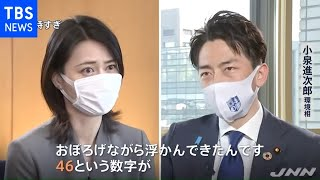

!pip uninstall -y scikit-learn
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

fit fold=0  0.114[s]
Fold 0 RMSE: 19.4168
fit fold=1  0.107[s]
Fold 1 RMSE: 20.4494
fit fold=2  0.112[s]
Fold 2 RMSE: 18.9447
fit fold=3  0.116[s]
Fold 3 RMSE: 14.1077
--------------------------------------------------
FINISHED | Whole RMSE: 18.3924


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


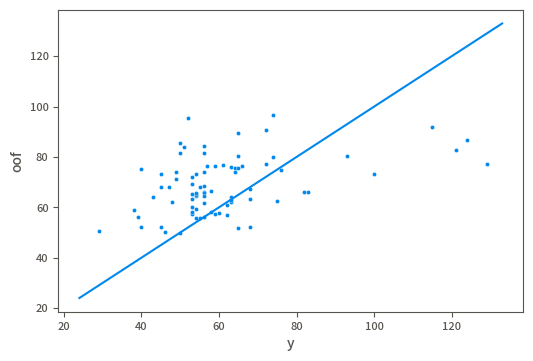

In [63]:
from sklearn.model_selection import TimeSeriesSplit

y = train_df['y']
#fold = KFold(n_splits=5, shuffle=True ,random_state=46)
fold = TimeSeriesSplit(n_splits=5, test_size=20)
cv = list(fold.split(train_feat_df, y)) # もともとが generator なため明示的に list に変換する

scores_df, models = fit_RandomForestTree(train_feat_df.values, y, cv[1:], params=params)
sns.scatterplot(scores_df['y'], scores_df['oof'])
ans = np.arange(scores_df['y'].min()-5, scores_df['y'].max()+5)
plt.plot(ans, ans)

## 特徴重要度の確認

RandomForest など木系のモデルではどの特徴量で分割を行ってどれだけ目的変数を説明しているかを特徴重要度 (feature importance) として出力することができます。これを見ることで

どの特徴量が大事なのか
どの特徴量はあまり大事ではないか
といった特徴量に関する情報を得ることができます。これによって、例えば重要となった特徴量を使う別の特徴を考えたり、反対に大事ではない特徴を削ったりといったインサイトを得ることが可能です。

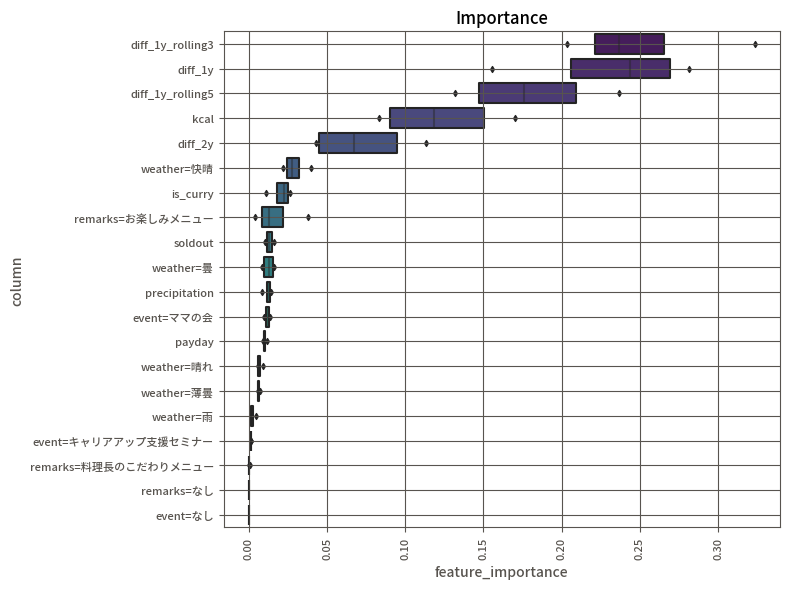

In [64]:
def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.

    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

fig, ax = visualize_importance(models, train_feat_df)

# 予測

In [65]:
pred = np.array([model.predict(test_feat_df.values) for model in models[1:]])
pred = np.mean(pred, axis=0)
sub_df = pd.DataFrame(index=sample_df['date'])
sub_df['y'] = pred
sub_df.to_csv(os.path.join(OUTPUT_DIR, '0005__submission.csv'), header=False)

<AxesSubplot:>

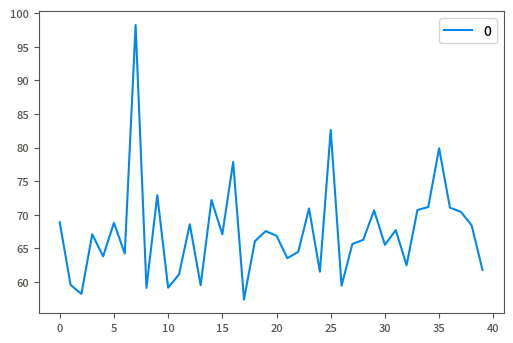

In [66]:
pd.DataFrame(pred).plot()

# 追加特徴量
これをみるとメニュー名をなんとか特徴量に使いたくなりますよね。

名前をベクトル化したものを特徴量にいれてみましょう。

今回名前のベクトル化（embedding）してみましょう。embeddingはBERTを使います。

[BERTとは](https://service.plan-b.co.jp/blog/seo/21067/)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertJapaneseTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertMode

run tsne 1.094[s]


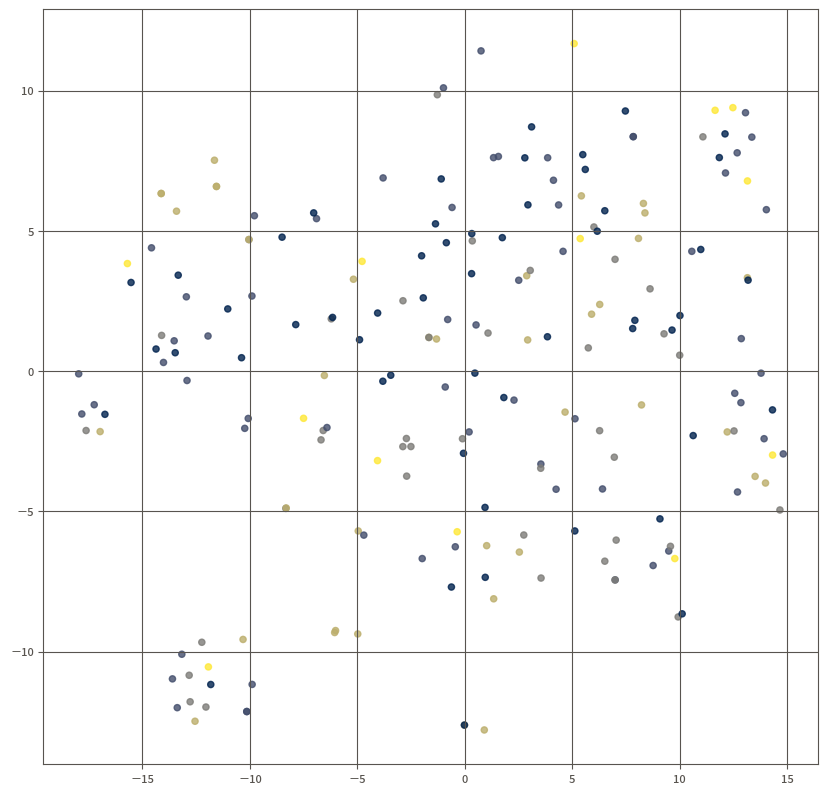

In [67]:
import torch
import transformers

from transformers import BertTokenizer
from tqdm import tqdm
tqdm.pandas()

class BertSequenceVectorizer:
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.model_name = "cl-tohoku/bert-base-japanese-whole-word-masking"
        self.tokenizer = BertTokenizer.from_pretrained(self.model_name)
        self.bert_model = transformers.BertModel.from_pretrained(self.model_name)
        self.bert_model = self.bert_model.to(self.device)
        self.max_len = 64


    def vectorize(self, sentence : str) -> np.array:
        inp = self.tokenizer.encode(sentence)
        len_inp = len(inp)

        if len_inp >= self.max_len:
            inputs = inp[:self.max_len]
            masks = [1] * self.max_len
        else:
            inputs = inp + [0] * (self.max_len - len_inp)
            masks = [1] * len_inp + [0] * (self.max_len - len_inp)

        inputs_tensor = torch.tensor([inputs], dtype=torch.long).to(self.device)
        masks_tensor = torch.tensor([masks], dtype=torch.long).to(self.device)

        bert_out = self.bert_model(inputs_tensor, masks_tensor)
        seq_out, pooled_out = bert_out['last_hidden_state'], bert_out['pooler_output']

        if torch.cuda.is_available():    
            return seq_out[0][0].cpu().detach().numpy() # 0番目は [CLS] token, 768 dim の文章特徴量
        else:
            return seq_out[0][0].detach().numpy()


def create_input_array(input_series):
    features = []
    for array in input_series:
        features.append(array)
    return pd.DataFrame(features).values.astype(np.float32)

BSV = BertSequenceVectorizer() # インスタンス化します
bert_features = pd.DataFrame()
bert_features['bert_features'] = train_df['name'].progress_apply(lambda x: BSV.vectorize(x))
feature = create_input_array(bert_features['bert_features'])

from MulticoreTSNE import MulticoreTSNE as TSNE
# tsneおそいのでちょっと時間かかる
with Timer(prefix='run tsne'):
    tsne = TSNE(n_jobs=-1)
    embedding = tsne.fit_transform(feature)
bin_labels = pd.cut(train_df['y'], bins=5)
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(*embedding.T, c=bin_labels.cat.codes, s=20, alpha=.8, cmap='cividis')
ax.grid()

<AxesSubplot:xlabel='0', ylabel='1'>

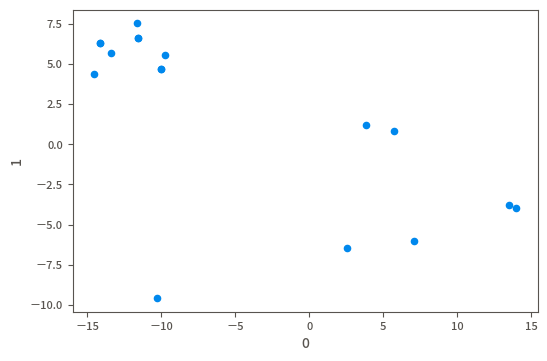

In [83]:
_df = pd.concat([pd.DataFrame(embedding), train_df[['y', 'name']]], axis=1)
_df = pd.concat([_df, create_is_curry_feature(_df)], axis=1)
_df[_df['is_curry']==1].plot.scatter(x=0, y=1)

In [84]:
_df[_df['is_curry']==1]

,0,1,y,name,is_curry
28,2.540306,-6.451799,131,カレー入りソーセージカツ,1
38,-10.319093,-9.566040,126,手作りひれかつとカレー,1
40,5.748919,0.826708,92,鶏のレモンペッパー焼orカレー,1
46,13.996060,-3.990702,139,ハンバーグカレーソース,1
59,7.045729,-6.025473,113,酢豚orカレー,1
65,13.511656,-3.753888,131,ハンバーグカレーソース,1
72,-14.580439,4.393363,68,ビーフカレー,1
83,-10.045888,4.687058,106,キーマカレー,1
93,-11.556770,6.581013,128,チキンカレー,1
115,-13.415568,5.699197,126,ポークカレー,1


  0% 0/8 [00:00<?, ?it/s]

createcreate_numeric_feature  0.001[s]
createcreate_kcal_feature  0.002[s]
createcreate_payday_feature  0.001[s]
createcreate_precipitation_feature  0.002[s]
createcreate_is_curry_feature  0.001[s]
createcreate_one_hot_encoding  0.010[s]



  0% 0/247 [00:00<?, ?it/s]
  3% 7/247 [00:00<00:03, 64.78it/s]
  6% 14/247 [00:00<00:03, 59.30it/s]
  8% 20/247 [00:00<00:04, 55.42it/s]
 11% 26/247 [00:00<00:03, 56.32it/s]
 13% 32/247 [00:00<00:03, 56.24it/s]
 15% 38/247 [00:00<00:03, 56.52it/s]
 18% 45/247 [00:00<00:03, 57.93it/s]
 21% 52/247 [00:00<00:03, 58.82it/s]
 23% 58/247 [00:01<00:03, 58.47it/s]
 26% 65/247 [00:01<00:03, 59.58it/s]
 29% 71/247 [00:01<00:02, 59.69it/s]
 31% 77/247 [00:01<00:02, 59.78it/s]
 34% 84/247 [00:01<00:02, 59.83it/s]
 36% 90/247 [00:01<00:02, 59.67it/s]
 39% 97/247 [00:01<00:02, 59.97it/s]
 42% 104/247 [00:01<00:02, 60.26it/s]
 45% 111/247 [00:01<00:02, 60.11it/s]
 48% 118/247 [00:01<00:02, 59.78it/s]
 51% 125/247 [00:02<00:02, 60.01it/s]
 53% 132/247 [00:02<00:01, 60.28it/s]
 56% 139/247 [00:02<00:01, 60.15it/s]
 59% 146/247 [00:02<00:01, 58.25it/s]
 62% 152/247 [00:02<00:01, 58.60it/s]
 64% 159/247 [00:02<00:01, 59.51it/s]
 67% 166/247 [00:02<00:01, 59.54it/s]
 70% 173/247 [00:02<00:01, 59.88it/s]

run tsne 1.746[s]
createname_bert_feature  6.022[s]
creatediff_y_feature  0.022[s]


  0% 0/8 [00:00<?, ?it/s]

createcreate_numeric_feature  0.001[s]
createcreate_kcal_feature  0.001[s]
createcreate_payday_feature  0.001[s]
createcreate_precipitation_feature  0.001[s]
createcreate_is_curry_feature  0.001[s]
createcreate_one_hot_encoding  0.006[s]



  0% 0/247 [00:00<?, ?it/s]
  3% 7/247 [00:00<00:03, 65.77it/s]
  6% 14/247 [00:00<00:03, 60.09it/s]
  9% 21/247 [00:00<00:03, 59.71it/s]
 11% 27/247 [00:00<00:03, 56.34it/s]
 14% 35/247 [00:00<00:03, 63.03it/s]
 17% 42/247 [00:00<00:03, 64.47it/s]
 20% 49/247 [00:00<00:03, 61.42it/s]
 23% 56/247 [00:00<00:03, 59.50it/s]
 25% 62/247 [00:01<00:03, 59.17it/s]
 28% 68/247 [00:01<00:03, 58.84it/s]
 30% 74/247 [00:01<00:02, 57.82it/s]
 32% 80/247 [00:01<00:02, 57.83it/s]
 35% 86/247 [00:01<00:02, 57.44it/s]
 37% 92/247 [00:01<00:02, 57.59it/s]
 40% 98/247 [00:01<00:02, 57.28it/s]
 42% 104/247 [00:01<00:02, 57.42it/s]
 45% 110/247 [00:01<00:02, 57.28it/s]
 47% 116/247 [00:01<00:02, 57.32it/s]
 49% 122/247 [00:02<00:02, 57.11it/s]
 52% 128/247 [00:02<00:02, 57.22it/s]
 54% 134/247 [00:02<00:01, 56.99it/s]
 57% 140/247 [00:02<00:01, 57.24it/s]
 59% 146/247 [00:02<00:01, 57.06it/s]
 62% 152/247 [00:02<00:01, 57.31it/s]
 64% 158/247 [00:02<00:01, 57.05it/s]
 66% 164/247 [00:02<00:01, 57.27it/s]

run tsne 0.205[s]
createname_bert_feature  4.534[s]
creatediff_y_feature  0.021[s]
fit fold=0  0.138[s]
Fold 0 RMSE: 21.6468


fit fold=1  0.137[s]
Fold 1 RMSE: 21.2795
fit fold=2  0.138[s]
Fold 2 RMSE: 20.6820
fit fold=3  0.137[s]
Fold 3 RMSE: 15.1281
--------------------------------------------------
FINISHED | Whole RMSE: 19.8620


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


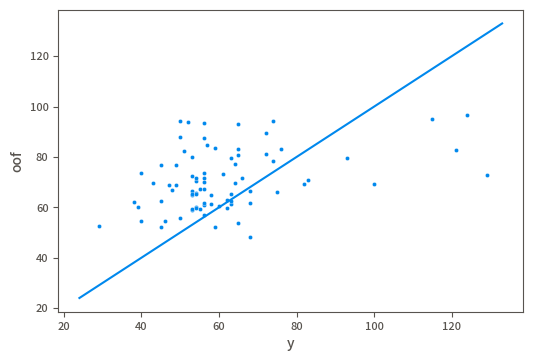

In [76]:
#bertを使った特徴量作成
def name_bert_feature(input_df):
    
    all_df = pd.concat([train_df, test_df])
    features_df = pd.DataFrame()
    features_df['datetime'] = all_df['datetime']
    all_df['name'] = all_df['name'].fillna("NaN") # null は代わりのもので埋めます
    features_df['name_feature'] = all_df['name'].progress_apply(lambda x: BSV.vectorize(x))
    
    merged_df = pd.merge(input_df['datetime'], features_df, how='left', on='datetime')
    features = pd.DataFrame(create_input_array(merged_df['name_feature']))
    with Timer(prefix='run tsne'):
        tsne = TSNE(n_components=4, n_jobs=-1)
        embedding = tsne.fit_transform(features)
    out_df = pd.DataFrame(embedding)
    return out_df.add_prefix('name_feature_')

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_numeric_feature, 
        create_kcal_feature, 
        create_payday_feature, 
        create_precipitation_feature, 
        create_is_curry_feature, 
        create_one_hot_encoding, 
        name_bert_feature, 
        diff_y_feature,
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

train_feat_df = to_feature(train_df)
test_feat_df = to_feature(test_df)

y = train_df['y']
#fold = KFold(n_splits=5, shuffle=True ,random_state=46)
fold = TimeSeriesSplit(n_splits=5, test_size=20)
cv = list(fold.split(train_feat_df, y)) # もともとが generator なため明示的に list に変換する

scores_df, models = fit_RandomForestTree(train_feat_df.values, y, cv[1:], params=params)
sns.scatterplot(scores_df['y'], scores_df['oof'])
ans = np.arange(scores_df['y'].min()-5, scores_df['y'].max()+5)
plt.plot(ans, ans)

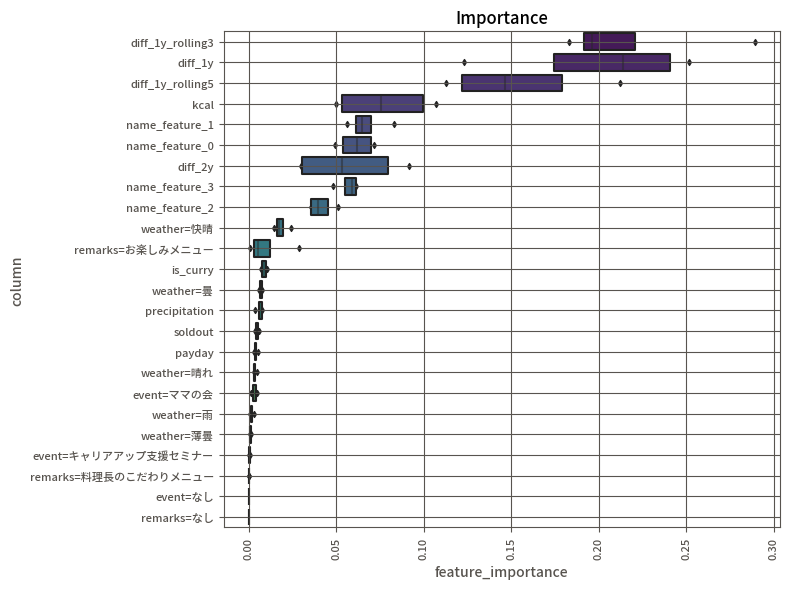

In [85]:
fig, ax = visualize_importance(models, train_feat_df)

In [86]:
pred = np.array([model.predict(test_feat_df.values) for model in models[2:]])
pred = np.mean(pred, axis=0)
sub_df = pd.DataFrame(index=sample_df['date'])
sub_df['y'] = pred
sub_df.to_csv(os.path.join(OUTPUT_DIR, '0006__submission.csv'), header=False)

<AxesSubplot:>

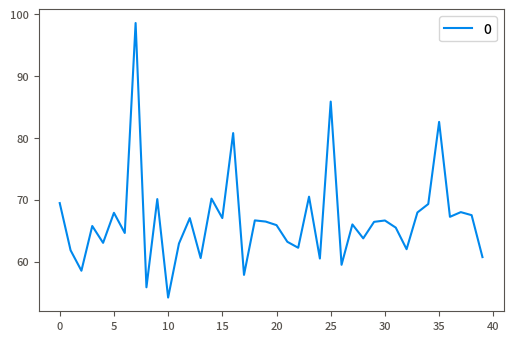

In [87]:
pd.DataFrame(pred).plot()

# この後やれること
- データの中身を理解する(EDA)
- 思いついた特徴量を作ってみる